**Parkinson’s disease (PD):**
it is a progressive neurodegenerative disorder that affects movement, causing symptoms like tremors, stiffness, and difficulty with balance and coordination. It mainly happens because dopamine-producing neurons in the brain die over time.

1. Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score as ras
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('parkinson_disease.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


The dataset we are going to use here includes 755 columns (*755 features which is too large !!!*) and three observations for each patient.

2. Data Exploration and Cleaning

In [2]:
# Displays the total number of rows and columns, the data types of each column and the count of non-null values. 
# This helps identify missing data and column types.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [3]:
df.describe()  # seems like there are no missing values in the dataset

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [4]:
df.isna().sum()  # check for missing values in each column

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

Therefore from the above analysis we concluded that our dataset contains no null/missing values and how the data is distributed in the given columns. Since there are no null/missing values there is no need for data cleaning.

3.  Data Wrangling

involves restructuring and transforming the dataset to make it suitable for analysis. Since our dataset contains three observations for each patient we need to aggregate them to create a single representative record per patient.

In [5]:
# Groups the dataset by the "id" column and calculates the mean of numerical features.
df.groupby('id').mean().reset_index()  
df.drop(columns=['id'], inplace=True)  # drop the 'id' column as it's no longer needed

**Multicollinearity** happens when two or more predictor(independent) variables in a model are closely related to each other. Because they give similar information, it becomes difficult to know how each one affects the result , To handle this we identify and remove highly correlated features from our dataset.

*Ways to detect :*
1. correlation matrix
2. Pairwise Scatter Plots 
3. Using Feature Importance from Random Forest



*Ways to handle :*
1. **Remove Redundant Variables:** If two or more predictor variables are highly correlated, one of them can be dropped. This helps in reducing redundancy and makes the model more stable. For example if "height" and "weight" are highly correlated we might drop one to prevent multicollinearity.
2. **Combine Variables:** When variables are strongly related they can be combined into a single feature. This approach can reduce multicollinearity and simplify the model. For example instead of keeping "total income from salary" and "total income from business" we can combine them into "total income".
3. **Regularization Techniques:** Methods like **Ridge or Lasso** regression can be used to reduce multicollinearity by penalizing the coefficients of correlated predictors. These methods shrink the coefficients helps in reducing their impact and improving model stability. *Ridge tends to shrink coefficients evenly while Lasso can set some coefficients to zero.*
4. **Collect More Data:** Increasing the size of the dataset can sometimes reduce multicollinearity as it helps in stabilizing the relationships between variables. With more data points the patterns between predictors and the target become clearer which reduces the chance of overfitting and multicollinearity.
5. **Principal Component Analysis (PCA):** PCA is a dimensionality reduction technique that can be used to transform the correlated predictor variables into a smaller set of uncorrelated variables. By using PCA we can remove multicollinearity while preserving the important information from the original variables.

In [6]:
# calculates the correlation between features and drops highly correlated features
# df[col].corr(df[col1]): Computes the Pearson correlation coefficient between two numerical features.
# If correlation > 0.7: The feature is considered highly correlated and is removed from the dataset to reduce redundancy.

columns = list(df.columns)
columns.remove('class')     # Exclude target variable from correlation checks

to_drop = set()

for i, col in enumerate(columns):
    if col in to_drop:
        continue
    for col1 in columns[i+1:]:
        if col1 in to_drop:
            continue
        val = df[col].corr(df[col1])
        if abs(val) > 0.7:   # drop if highly correlated
            to_drop.add(col1)

# Drop after the loop
df = df.drop(columns=list(to_drop))
print("Dropped:", to_drop)
print("New shape:", df.shape)


Dropped: {'det_LT_TKEO_mean_5_coef', 'tqwt_maxValue_dec_16', 'app_TKEO_std_10_coef', 'tqwt_minValue_dec_23', 'det_LT_TKEO_std_8_coef', 'tqwt_minValue_dec_7', 'det_entropy_log_8_coef', 'tqwt_maxValue_dec_5', 'tqwt_TKEO_std_dec_33', 'tqwt_maxValue_dec_13', 'tqwt_kurtosisValue_dec_35', 'det_LT_TKEO_std_6_coef', 'tqwt_stdValue_dec_29', 'std_7th_delta_delta', 'tqwt_entropy_shannon_dec_16', 'tqwt_stdValue_dec_14', 'tqwt_minValue_dec_27', 'tqwt_TKEO_std_dec_3', 'std_10th_delta_delta', 'app_det_TKEO_mean_1_coef', 'det_TKEO_mean_5_coef', 'tqwt_skewnessValue_dec_28', 'tqwt_stdValue_dec_24', 'apq3Shimmer', 'det_TKEO_std_3_coef', 'tqwt_minValue_dec_15', 'tqwt_entropy_shannon_dec_19', 'app_LT_TKEO_std_9_coef', 'det_LT_TKEO_mean_8_coef', 'meanAutoCorrHarmonicity', 'tqwt_TKEO_std_dec_4', 'tqwt_maxValue_dec_6', 'app_LT_entropy_shannon_4_coef', 'Ed_6_coef', 'det_LT_entropy_shannon_5_coef', 'tqwt_maxValue_dec_23', 'tqwt_minValue_dec_35', 'tqwt_minValue_dec_11', 'tqwt_minValue_dec_19', 'GNE_std', 'tqwt_s

Now we can see that the dataset contained 755 features but after removing highly correlated ones the feature space was *reduced to 287 columns.* However this is still significantly high as the number of features exceeds the number of data points (252 examples).

To improve model performance and reduce computational complexity we apply feature selection using the **chi-square test** to retain only the most relevant features.

 a Chi-Square test is done on two distributions to determine the level of similarity of their respective variances. In its null hypothesis, it assumes that the given distributions are independent. This test thus can be used to determine the best features for a given dataset by determining the features on which the output class label is most dependent.

In [7]:
X = df.drop('class', axis=1)

# Normalize the features to a range of [0, 1] 
# to ensure that all features contribute equally to the distance calculations in the chi-square test.
X_norm = MinMaxScaler().fit_transform(X) 

# Apply the chi-square test to select the top 30 features 
# based on their statistical significance with respect to the target variable 'class'.
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])

#  Identifies the selected features and filters the original DataFrame to keep only those features.
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]

# Add the target variable 'class' back to the filtered DataFrame
filtered_data['class'] = df['class']
df = filtered_data
df.shape

(756, 31)

Therefore we reduce the dimensionality of our dataset by 30 since 1 is "class" column, while preserving the most important features making our dataset more efficient for model training.

4. Handling Class Imbalance and Splitting Data

To understand the distribution of target classes in our dataset, we use a pie chart. This helps us check for class imbalances, which can impact model performance.

class
1    564
0    192
Name: count, dtype: int64


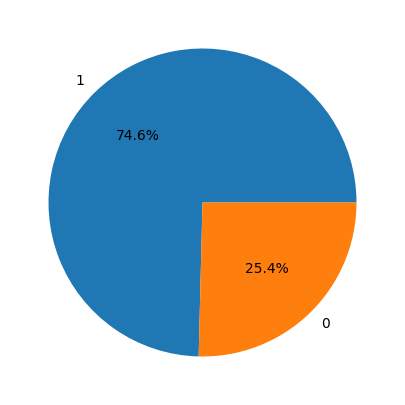

In [8]:
cnt = df['class'].value_counts()
print(cnt)
plt.figure(figsize=(8, 5))
plt.pie(cnt, labels=cnt.index, autopct='%.1f%%')
plt.show()

To build a robust machine learning model we need to address this class imbalance and properly split the dataset into training and validation sets. If the dataset is imbalanced the model may become biased toward the majority class making it difficult to correctly predict the minority class.

In [9]:
features= df.drop('class', axis=1)
target = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=42)

# Handle class imbalance using RandomOverSampler which randomly oversamples the minority class
# this helps to balance the class distribution in the training set and make minority equal to majority
ros= RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(f"Original training set size: {len(y_train)}")
print(f"Resampled training set size: {len(y_train_resampled)}")

y_train_resampled.value_counts()


Original training set size: 604
Resampled training set size: 902


class
1    451
0    451
Name: count, dtype: int64

By performing oversampling we created a balanced dataset preventing model bias toward the majority class making it more accurate on unseen data .

5. Model Training and Evaluation

In [10]:
models = {
        'Logistic Regression': LogisticRegression(),
        'XGBClassifier': XGBClassifier(),
        'SVC': SVC(kernel='rbf',probability=True)
        }  
for name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)    
        print(f"{name} \n ROC AUC Score: {ras(y_test, y_pred)}")

Logistic Regression 
 ROC AUC Score: 0.7054685727252099
XGBClassifier 
 ROC AUC Score: 0.7767188563648741
SVC 
 ROC AUC Score: 0.6161788064442932


from the above, we conclude that XGBClassifier is most model preformed well 

6. Analyzing Model Performance

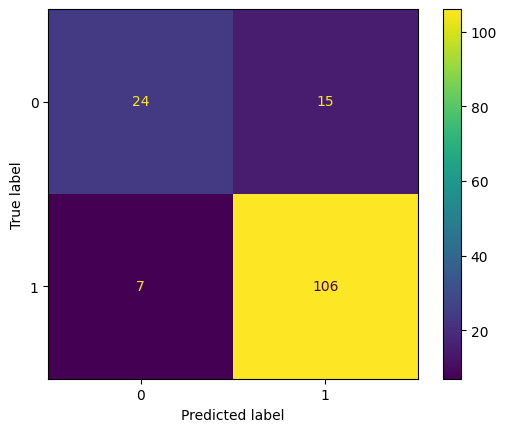

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        39
           1       0.88      0.94      0.91       113

    accuracy                           0.86       152
   macro avg       0.83      0.78      0.80       152
weighted avg       0.85      0.86      0.85       152



In [11]:
# fit using the best model
classifier = XGBClassifier()
classifier.fit(X_train_resampled, y_train_resampled)
y_pred = classifier.predict(X_test)


# preform confusion matrix and classification report for the best model
cm = confusion_matrix(y_test, y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))


- The model really favors class 1 (high precision & recall).

- Class 0 is good but weaker, recall 0.62 means it’s still missing ~38% of them.

- Since you have fewer samples in class 0 (39 vs. 113), that imbalance still hurts recall.